### Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

### Data Creation

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

### Data Preprocessing

In [5]:
#checking shape of input train set
x_train.shape

(60000, 28, 28)

In [7]:
#checking shape of input test set
x_test.shape

(10000, 28, 28)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train /= 255
x_test /= 255

### Model Creation
### Threesteps involves on creating model
### 1.Sequential
### 2.compile
### 3.fit

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2041 - accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0813 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0560 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0432 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0344 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0288 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0228 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0169 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 49s 26m

### Testing a model

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0739 - accuracy: 0.9826


[0.07388139516115189, 0.9825999736785889]

In [14]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [15]:
y_predict[0]

array([5.0078938e-11, 3.5117055e-11, 1.7141891e-08, 6.0140311e-09,
       1.5061166e-11, 1.9929783e-12, 2.0299509e-15, 1.0000000e+00,
       5.0562358e-12, 6.1276983e-10], dtype=float32)

In [16]:
# Here we get the index of maximum value in the encoded vector
y_predicts=np.argmax(y_predict, axis=1) 

In [17]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

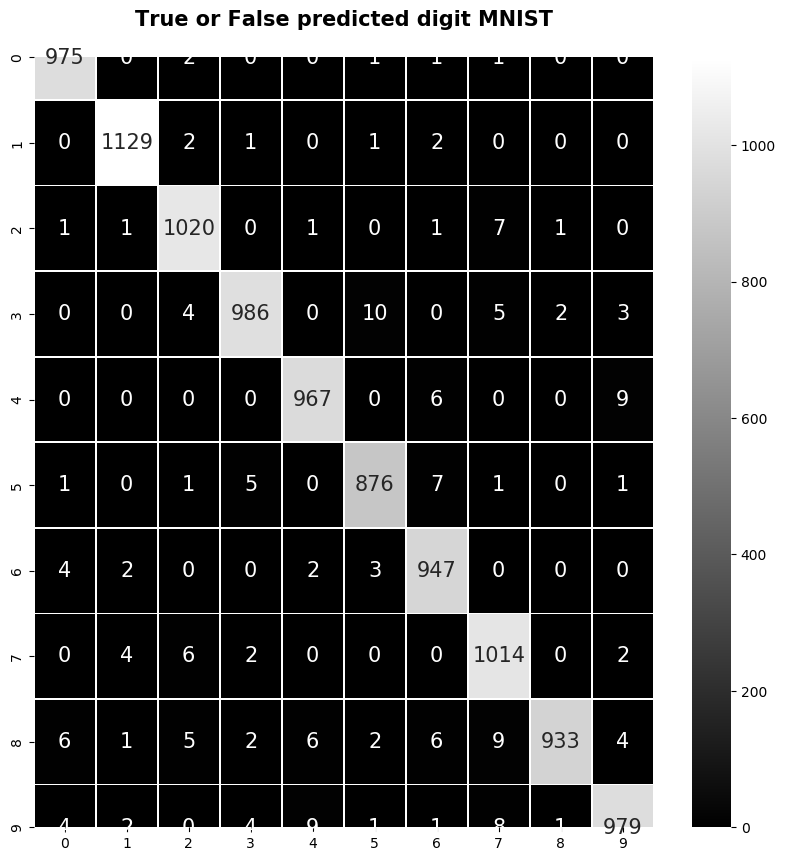

In [23]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



1/1 [==============================] - 0s 145ms/step
6


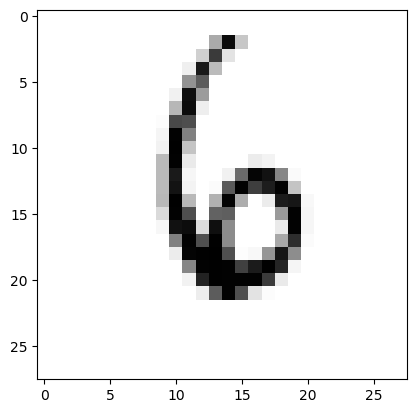

In [29]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())